<span style='color:Blue'> <span style="font-size:25px;"> **[1-BRSA-1116-RJS] Loading-Sorting-Preprocessing-create log plot-export CSV file of a DLIS file**

In [1]:
%%capture

%pip install dlisio                                                   
%pip install qbstyles                                                 
%pip install folium 
%pip install geopandas

from dlisio import dlis
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches                                 

import folium                                                         
from folium import plugins 
import json                                                           

from qbstyles import mpl_style
mpl_style(dark=False)                                                 

from matplotlib_inline.backend_inline import set_matplotlib_formats   
set_matplotlib_formats('svg')                                         

<span style='color:black'> <span style="font-size:30px;"> **1-BRSA-1116-RJS**

<span style='color:brown'> <span style="font-size:19px;"> **STEP 2: load all the required DLIS files**

In [2]:
dlis0, *tail0 = dlis.load('/Users/amirhosseinakhondzadeh/@ DATA/1-BRSA-1116-RJS/Perfil Convencional/1-brsa-1116-rjs_8a_ait_tdd.dlis')
dlis1, *tail1 = dlis.load('/Users/amirhosseinakhondzadeh/@ DATA/1-BRSA-1116-RJS/Perfil Convencional/1-brsa-1116-rjs_8a_cmr.dlis')
dlis2, *tail2 = dlis.load('/Users/amirhosseinakhondzadeh/@ DATA/1-BRSA-1116-RJS/Perfil Convencional/1-brsa-1116-rjs_8a_ubi.dlis')
dlis3, *tail3 = dlis.load('/Users/amirhosseinakhondzadeh/@ DATA/1-BRSA-1116-RJS/Perfil Convencional/1-brsa-1116-rjs_8a2_cmr.dlis')
dlis4, *tail4 = dlis.load('/Users/amirhosseinakhondzadeh/@ DATA/1-BRSA-1116-RJS/Perfil Convencional/1-brsa-1116-rjs_8f_ait_tdd.dlis')
dlis5, *tail5 = dlis.load('/Users/amirhosseinakhondzadeh/@ DATA/1-BRSA-1116-RJS/Perfil Convencional/1-brsa-1116-rjs_8a2_ait_tdd.dlis')

In [3]:
# Define a list of dlis object names (assuming dlis0, dlis1, ..., dlis9 exist)
dlis_names = [f'dlis{i}' for i in range(6)]

# Define depth_units
depth_units = "in"  # Replace "units" with the actual units you want to use

for dlis_name in dlis_names:
    dlis = globals()[dlis_name]  # Get the dlis object using its name
    print("=" * 80)
    print(f"DLIS Object: {dlis_name}")
    print("=" * 80)

    for frame in dlis.frames:
        print(f"Frame Name:         {frame.name}")
        print(f"Number of Channels: {len(frame.channels)}")
        print(f"Depth Interval:     {frame.index_min} - {frame.index_max} {depth_units}")
        print(f"Depth Spacing:      {frame.spacing} {depth_units}")
        print(f"Channel Names:      {', '.join(channel.name for channel in frame.channels)}")
        print("-" * 80)

    print("%" * 80)

DLIS Object: dlis0
Frame Name:         60B
Number of Channels: 68
Depth Interval:     2088600 - 2167020 in
Depth Spacing:      -60 in
Channel Names:      TDEP, BS, CS, TENS, ETIM, GTEM, RT, SP, SPAR, PXND_HILT, RHGX_HILT, UMA_HILT, HPATT, HLRGB, PHIE_HILT, RMFA_HILT, RO_HILT, VCL_HILT, RWA_HILT, SW_HILT, NCYT, QCBSL, BSD1, SSD1, LSD1, QCMCFL, RXIG, HTEM, ECGR, CFGR, GR, RTNR, NPHI, NPL, DRTA, DNPH, QCPOR, TNPH, TALP, RCFT, RCNT, CFTC, TNRA, CNTC, NPOR, GDEV, HWER, TGST, DCAL, FCD, HDAR, ASCA, ASFI, TIME, CVEL, BHPR, EBSZ, ESSZ, ELSZ, HWEC, DF, CDF, AREA, AFCD, ABS, IHV, ICV, ATCA
--------------------------------------------------------------------------------
Frame Name:         10B
Number of Channels: 19
Depth Interval:     2088610 - 2167020 in
Depth Spacing:      -10 in
Channel Names:      TDEP, IDWD, SCD, HDRX, RXOI, RXV, RVV, HCAL, LHEW, TIME, SCDV, FCBR, BSW, LSW, SSW, BSWU, SSWU, LSWU, LWTO
--------------------------------------------------------------------------------
Frame Nam

<span style='color:green'> <span style="font-size:19px;"> **STEP 2: create Pandas DataFrames containing all the required Well Log Data**

1116


=========
DLIS 0 -60B
RHGX_HILT
GR
NPHI


=========
DLIS 0 -30B
AT10, AT20, AT30, AT60, AT90


=========
DLIS 0 -20B
PEFZ
RHOZ


==================


DLIS 1 -60B
GR
NPHI

=========
DLIS 1 -75B
CMRP_3MS, CMFF, TCMR


==================

DLIS 2-60B
GR_EDTC

==================

DLIS 3-60B
GR_EDTC


DLIS 3-30B
AT10, AT20, AT30, AT60, AT90

DLIS 3 -75B
CMRP_3MS, CMFF, TCMR


==================

DLIS 4-60B

DTCO
RHGX_HILT
GR
GR_EDTC

=========

DLIS 4-60B

DTCO
RHGX_HILT
GR
GR_EDTC

=========

DLIS 4-20B

PEFZ
RHOZ

=========

DLIS 4-30B
AT10, AT20, AT30, AT60, AT90

==================

DLIS 5-60B
DTCO
RHGX_HILT
GR
NPHI
GDEV_EDTC

=========

DLIS 5-20B
PEFZ
RHOZ

=========

DLIS 5-30B
AT10, AT20, AT30, AT60, AT90

#=======

| Lithological Log | Resistivity Log | Porosity Logs |
|:---------------- |:---------------:|--------------:|
| RHGX_HILT        | AT10 .ohm.m     | NPHI    |
| NPHI             | AT20 .ohm.m     |          |
| GR             | AT30 .ohm.m     |          |
    |              | AT30 .ohm.m     |          |
    |              | AT30 .ohm.m     |          |

In [4]:
# Create variable "f" which stands for frame

# NOTE: [DLIS 2-60B  ===> GR_EDTC]
#       [DLIS 3-60B  ===> GR_EDTC]
#       [DLIS 4-60B  ===> GR_EDTC]

f0 = dlis0.object('FRAME','60B') # RHGX_HILT, GR, NPHI
f1 = dlis0.object('FRAME','30B') # AT10, AT20, AT30, AT60, AT90
f2 = dlis0.object('FRAME','20B') # RHOZ, PEFZ

f3 = dlis1.object('FRAME','60B') # GR, NPHI
f4 = dlis1.object('FRAME','75B') # CMRP_3MS, CMFF, TCMR

f5 = dlis3.object('FRAME','30B') # AT10, AT20, AT30, AT60, AT90
f6 = dlis3.object('FRAME','75B') # CMRP_3MS, CMFF, TCMR

f7 = dlis4.object('FRAME','60B') # RHGX_HILT, GR, NPHI, DTCO
f8 = dlis4.object('FRAME','20B') # RHOZ, PEFZ
f9 = dlis4.object('FRAME','30B') # AT10, AT20, AT30, AT60, AT90

f10 = dlis5.object('FRAME','60B') # RHGX_HILT, GR, NPHI, DTCO
f11 = dlis5.object('FRAME','20B') # RHOZ, PEFZ
f12 = dlis5.object('FRAME','30B') # AT10, AT20, AT30, AT60, AT90

In [5]:
# Create variables "c" which stands for channel
c0 = f0.curves()
c1 = f1.curves()
c2 = f2.curves()
c3 = f3.curves()
c4 = f4.curves()
c5 = f5.curves()
c6 = f6.curves()
c7 = f7.curves()
c8 = f8.curves()
c9 = f9.curves()
c10 = f10.curves()
c11 = f11.curves()
c12 = f12.curves()

In [6]:
# Define the channels/logging curves of interest for each frame "f"
# Convert DEPTH values to metres, by multiplying by 0.00254. 
# *0.00254

d0  = {'DEPTH'     : c0['TDEP']*0.00254,
       'GR'        : c0['GR'],
       'NPHI'      : c0['NPHI']}


d1  = {'DEPTH'     : c1['TDEP']*0.00254,
       'AT10'      : c1['AT10'],
       'AT20'      : c1['AT20'],
       'AT30'      : c1['AT30'],
       'AT60'      : c1['AT60'],
       'AT90'      : c1['AT90']}

d2  = {'DEPTH'     : c2['TDEP']*0.00254,
       'RHOZ'      : c2['RHOZ'],
       'PEFZ'      : c2['PEFZ']}


d3  = {'DEPTH'     : c3['TDEP']*0.00254,
       'GR'        : c3['GR'],
       'NPHI'      : c3['NPHI']}


d4  = {'DEPTH'     : c4['TDEP']*0.00254,
       'CMFF'      : c4['CMFF'],
       'TCMR'      : c4['TCMR'],
       'CMRP_3MS'  : c4['CMRP_3MS']}


d5  = {'DEPTH'     : c5['TDEP']*0.00254,
       'AT10'      : c5['AT10'],
       'AT20'      : c5['AT20'],
       'AT30'      : c5['AT30'],
       'AT60'      : c5['AT60'],
       'AT90'      : c5['AT90']}


d6  = {'DEPTH'     : c6['TDEP']*0.00254,
       'CMFF'      : c6['CMFF'],
       'TCMR'      : c6['TCMR'],
       'CMRP_3MS'  : c6['CMRP_3MS']}


d7  = {'DEPTH'     : c7['TDEP']*0.00254,
       'GR'        : c7['GR'],
       'NPHI'      : c7['NPHI'],
       'DTCO'      : c7['DTCO']}


d8  = {'DEPTH'     : c8['TDEP']*0.00254,
       'RHOZ'      : c8['RHOZ'],
       'PEFZ'      : c8['PEFZ']}


d9  = {'DEPTH'     : c9['TDEP']*0.00254,
       'AT10'      : c9['AT10'],
       'AT20'      : c9['AT20'],
       'AT30'      : c9['AT30'],
       'AT60'      : c9['AT60'],
       'AT90'      : c9['AT90']}

d10  = {'DEPTH'    : c10['TDEP']*0.00254,
       'GR'        : c10['GR'],
       'NPHI'      : c10['NPHI'],
       'DTCO'      : c10['DTCO']}

d11  = {'DEPTH'    : c11['TDEP']*0.00254,
       'RHOZ'      : c11['RHOZ'],
       'PEFZ'      : c11['PEFZ']}

d12  = {'DEPTH'    : c12['TDEP']*0.00254,
       'AT10'      : c12['AT10'],
       'AT20'      : c12['AT20'],
       'AT30'      : c12['AT30'],
       'AT60'      : c12['AT60'],
       'AT90'      : c12['AT90']}

In [7]:
# Create dataframes containing the required well logging curves 
df0 = pd.DataFrame(d0)  
df1 = pd.DataFrame(d1) 
df2 = pd.DataFrame(d2)  
df3 = pd.DataFrame(d3)
df4 = pd.DataFrame(d4)
df5 = pd.DataFrame(d5)
df6 = pd.DataFrame(d6)  
df7 = pd.DataFrame(d7) 
df8 = pd.DataFrame(d8)  
df9 = pd.DataFrame(d9)
df10 = pd.DataFrame(d10)
df11 = pd.DataFrame(d11)
df12 = pd.DataFrame(d12)

In [8]:
# Print the dataframes 
df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12

(            DEPTH         GR      NPHI
 0     5504.230957  76.363640  0.057149
 1     5504.078613  76.363640  0.057149
 2     5503.926270  76.363640  0.057149
 3     5503.773438  76.363640  0.057149
 4     5503.621094  76.363640  0.057149
 ...           ...        ...       ...
 1303  5305.653809   7.539165 -0.006284
 1304  5305.501465   6.347286 -0.005099
 1305  5305.348633   6.467046 -0.004080
 1306  5305.196289   6.467046 -0.004440
 1307  5305.043945   6.467046 -0.004440
 
 [1308 rows x 3 columns],
             DEPTH         AT10        AT20    AT30        AT60        AT90
 0     5504.230957   120.474243  615.321533  1950.0  583.529785  175.220062
 1     5504.154785   120.471237  615.739807  1950.0  583.104675  174.994858
 2     5504.078613   120.469009  616.439392  1950.0  582.651001  174.802155
 3     5504.002441   120.467903  617.503845  1950.0  582.396484  174.553894
 4     5503.926270   120.468315  619.022949  1950.0  583.024780  174.144073
 ...           ...          ...     

<span style='color:brown'> <span style="font-size:19px;"> **STEP 3: Data Pre-Processing**

In [9]:
# Remove "-999.250000" from each dataframe. It does not make any sense.

df0.drop(df0.loc[df0['NPHI']==-999.25].index, inplace=True)
df0.drop(df0.loc[df0['GR']==-999.25].index, inplace=True)
        
df1.drop(df1.loc[df1['AT10']==-999.25].index, inplace=True)
df1.drop(df1.loc[df1['AT20']==-999.25].index, inplace=True)
df1.drop(df1.loc[df1['AT30']==-999.25].index, inplace=True)
df1.drop(df1.loc[df1['AT60']==-999.25].index, inplace=True)
df1.drop(df1.loc[df1['AT90']==-999.25].index, inplace=True)
        
df2.drop(df2.loc[df2['RHOZ']==-999.25].index, inplace=True)
df2.drop(df2.loc[df2['PEFZ']==-999.25].index, inplace=True)
        
df3.drop(df3.loc[df3['GR']==-999.25].index, inplace=True)
df3.drop(df3.loc[df3['NPHI']==-999.25].index, inplace=True)

df4.drop(df4.loc[df4['CMFF']==-999.25].index, inplace=True)
df4.drop(df4.loc[df4['TCMR']==-999.25].index, inplace=True)
df4.drop(df4.loc[df4['CMRP_3MS']==-999.25].index, inplace=True)

df5.drop(df5.loc[df5['AT10']==-999.25].index, inplace=True)
df5.drop(df5.loc[df5['AT20']==-999.25].index, inplace=True)
df5.drop(df5.loc[df5['AT30']==-999.25].index, inplace=True)
df5.drop(df5.loc[df5['AT60']==-999.25].index, inplace=True)
df5.drop(df5.loc[df5['AT90']==-999.25].index, inplace=True)

df6.drop(df6.loc[df6['CMFF']==-999.25].index, inplace=True)
df6.drop(df6.loc[df6['TCMR']==-999.25].index, inplace=True)
df6.drop(df6.loc[df6['CMRP_3MS']==-999.25].index, inplace=True)

df7.drop(df7.loc[df7['DTCO']==-999.25].index, inplace=True)
df7.drop(df7.loc[df7['GR']==-999.25].index, inplace=True)
df7.drop(df7.loc[df7['NPHI']==-999.25].index, inplace=True)

df8.drop(df8.loc[df8['RHOZ']==-999.25].index, inplace=True)
df8.drop(df8.loc[df8['PEFZ']==-999.25].index, inplace=True)

df9.drop(df9.loc[df9['AT10']==-999.25].index, inplace=True)
df9.drop(df9.loc[df9['AT20']==-999.25].index, inplace=True)
df9.drop(df9.loc[df9['AT30']==-999.25].index, inplace=True)
df9.drop(df9.loc[df9['AT60']==-999.25].index, inplace=True)
df9.drop(df9.loc[df9['AT90']==-999.25].index, inplace=True)

df10.drop(df10.loc[df10['DTCO']==-999.25].index, inplace=True)
df10.drop(df10.loc[df10['GR']==-999.25].index, inplace=True)
df10.drop(df10.loc[df10['NPHI']==-999.25].index, inplace=True)

df11.drop(df11.loc[df11['RHOZ']==-999.25].index, inplace=True)
df11.drop(df11.loc[df11['PEFZ']==-999.25].index, inplace=True)

df12.drop(df12.loc[df12['AT10']==-999.25].index, inplace=True)
df12.drop(df12.loc[df12['AT20']==-999.25].index, inplace=True)
df12.drop(df12.loc[df12['AT30']==-999.25].index, inplace=True)
df12.drop(df12.loc[df12['AT60']==-999.25].index, inplace=True)
df12.drop(df12.loc[df12['AT90']==-999.25].index, inplace=True)

In [10]:
# Reset the Index of each dataframe 
# (drop=True) means that the current Index will be replaced entirely 
"""df0 = df0.reset_index(drop=True)
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)
df3 = df3.reset_index(drop=True) 
df4 = df4.reset_index(drop=True) 
df5 = df5.reset_index(drop=True)
df6 = df6.reset_index(drop=True)
df7 = df7.reset_index(drop=True) 
df8 = df8.reset_index(drop=True) 
df9 = df9.reset_index(drop=True)
df10 = df10.reset_index(drop=True) 
df11 = df11.reset_index(drop=True) 
df12 = df12.reset_index(drop=True)"""

'df0 = df0.reset_index(drop=True)\ndf1 = df1.reset_index(drop=True)\ndf2 = df2.reset_index(drop=True)\ndf3 = df3.reset_index(drop=True) \ndf4 = df4.reset_index(drop=True) \ndf5 = df5.reset_index(drop=True)\ndf6 = df6.reset_index(drop=True)\ndf7 = df7.reset_index(drop=True) \ndf8 = df8.reset_index(drop=True) \ndf9 = df9.reset_index(drop=True)\ndf10 = df10.reset_index(drop=True) \ndf11 = df11.reset_index(drop=True) \ndf12 = df12.reset_index(drop=True)'

In [11]:
# Invert the order of values, in all the dataframes. By means "iloc indexer" we can select the columns in reverse order
df0  = df0.iloc[::-1]
df1  = df1.iloc[::-1]
df2  = df2.iloc[::-1]
df3  = df3.iloc[::-1]
df4  = df4.iloc[::-1]
df5  = df5.iloc[::-1]
df6  = df6.iloc[::-1]
df7  = df7.iloc[::-1]
df8  = df8.iloc[::-1]
df9  = df9.iloc[::-1]
df10  = df10.iloc[::-1]
df11  = df11.iloc[::-1]
df12  = df12.iloc[::-1]

In [12]:
df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12

(            DEPTH         GR      NPHI
 1307  5305.043945   6.467046 -0.004440
 1306  5305.196289   6.467046 -0.004440
 1305  5305.348633   6.467046 -0.004080
 1304  5305.501465   6.347286 -0.005099
 1303  5305.653809   7.539165 -0.006284
 ...           ...        ...       ...
 4     5503.621094  76.363640  0.057149
 3     5503.773438  76.363640  0.057149
 2     5503.926270  76.363640  0.057149
 1     5504.078613  76.363640  0.057149
 0     5504.230957  76.363640  0.057149
 
 [1308 rows x 3 columns],
             DEPTH         AT10        AT20    AT30        AT60        AT90
 2613  5305.120117  1950.000000    1.117028  1950.0   49.574757   49.224545
 2612  5305.196289  1950.000000    1.117028  1950.0   49.574757   49.224545
 2611  5305.272461  1950.000000    1.117028  1950.0   49.574757   49.224545
 2610  5305.348633  1950.000000    1.117028  1950.0   49.574757   49.224545
 2609  5305.424805  1950.000000    1.117028  1950.0   49.574757   49.224545
 ...           ...          ...     

In [13]:
# Reset the Index of each dataframe 
df0  = df0.reset_index(drop=True) 
df1  = df1.reset_index(drop=True)
df2  = df2.reset_index(drop=True)
df3  = df3.reset_index(drop=True)
df4  = df4.reset_index(drop=True)
df5  = df5.reset_index(drop=True)
df6  = df6.reset_index(drop=True) 
df7  = df7.reset_index(drop=True)
df8  = df8.reset_index(drop=True)
df9  = df9.reset_index(drop=True)
df10  = df10.reset_index(drop=True)
df11  = df11.reset_index(drop=True)
df12  = df12.reset_index(drop=True)

In [14]:
# Print the new dataframes 
df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12

# List of DataFrames
dfs = [df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]

# Iterate through each DataFrame and remove NaN values in place
for df in dfs:
    df.dropna(inplace=True)

In [15]:
#df0.describe(), df1.describe(), df2.describe(), df3.describe(), df4.describe(), df5.describe(), df6.describe(), df7.describe(), df8.describe(), df9.describe(), df10.describe(), df11.describe(), df12.describe()

<span style='color:brown'> <span style="font-size:19px;"> **STEP 4: Create dataframe of each well-log data [unique dataframe] to plot them versus depth**

**GR log**

**GR:**
* df0 ==> 5305.043945 - 5504.230957 
* df3 ==> 4974.183594 - 5502.859375
* df7 ==> 5719.876953 - 5938.875488
* df10 ==> 5317.388672 - 5799.125000

In [16]:
df0_GR = df0.drop(columns=["NPHI"])
df3_GR = df3.drop(columns=["NPHI"])
df7_GR = df7.drop(columns=["NPHI", "DTCO"])
df10_GR = df10.drop(columns=["NPHI", "DTCO"])

In [17]:
#df3_GR = df3.drop(columns=["NPHI"])
df3_GR = df3_GR.drop(df3_GR.index[326:])  

In [18]:
#df10_GR = df10.drop(columns=["NPHI"])
df10_GR = df10_GR.drop(df10_GR.index[:1235])  

In [19]:
#df7_GR = df7.drop(columns=["NPHI"])
df7_GR = df7_GR.drop(df7_GR.index[:525])  

In [20]:
df3_GR, df0_GR, df10_GR, df7_GR

(            DEPTH        GR
 64    4983.937012  5.541706
 65    4984.089844  6.501554
 66    4984.242188  6.245832
 79    4986.223145  8.141735
 80    4986.375488  7.004835
 ...           ...       ...
 2159  5303.215332  6.456248
 2165  5304.129395  6.836332
 2166  5304.282227  8.229173
 2168  5304.586914  7.597303
 2169  5304.739258  7.342529
 
 [326 rows x 2 columns],
             DEPTH         GR
 0     5305.043945   6.467046
 1     5305.196289   6.467046
 2     5305.348633   6.467046
 3     5305.501465   6.347286
 4     5305.653809   7.539165
 ...           ...        ...
 1303  5503.621094  76.363640
 1304  5503.773438  76.363640
 1305  5503.926270  76.363640
 1306  5504.078613  76.363640
 1307  5504.230957  76.363640
 
 [1308 rows x 2 columns],
             DEPTH         GR
 1235  5505.602539  45.078979
 1236  5505.754883  48.950291
 1237  5505.907227  55.470501
 1238  5506.059570  64.026672
 1239  5506.211914  60.333729
 ...           ...        ...
 3157  5798.515137  44.2099

In [21]:
df_GR = pd.concat([df3_GR, df0_GR, df10_GR, df7_GR], axis = 0, ignore_index = True)
df_GR

,DEPTH,GR
0,4983.937012,5.541706
1,4984.089844,6.501554
2,4984.242188,6.245832
3,4986.223145,8.141735
4,4986.375488,7.004835
...,...,...
4469,5938.266113,77.848549
4470,5938.418457,77.848549
4471,5938.570801,77.848549
4472,5938.723145,77.848549


**Nuetron Porosity Log**

**NPHI:**
* df0 ==> 5305.043945 - 5504.230957 
* df3 ==> 4974.183594 - 5502.859375
* df7 ==> 5719.876953 - 5938.875488
* df10 ==> 5317.388672 - 5799.125000

In [22]:
df0_NPHI = df0.drop(columns=["GR"])
df3_NPHI = df3.drop(columns=["GR"])
df7_NPHI = df7.drop(columns=["GR", "DTCO"])
df10_NPHI = df10.drop(columns=["GR", "DTCO"])

In [23]:
#df3_GR = df3.drop(columns=["NPHI"])
df3_NPHI = df3_NPHI.drop(df3_NPHI.index[326:])  

In [24]:
#df10_GR = df10.drop(columns=["NPHI"])
df10_NPHI = df10_NPHI.drop(df10_NPHI.index[:1235])  

In [25]:
#df7_GR = df7.drop(columns=["NPHI"])
df7_NPHI = df7_NPHI.drop(df7_NPHI.index[:525])  

In [26]:
df3_NPHI, df0_NPHI, df10_NPHI, df7_NPHI

(            DEPTH      NPHI
 64    4983.937012  0.133101
 65    4984.089844  0.163406
 66    4984.242188  0.267674
 79    4986.223145 -0.053988
 80    4986.375488 -0.051041
 ...           ...       ...
 2159  5303.215332 -0.090436
 2165  5304.129395 -0.056617
 2166  5304.282227 -0.087654
 2168  5304.586914 -0.151071
 2169  5304.739258 -0.125238
 
 [326 rows x 2 columns],
             DEPTH      NPHI
 0     5305.043945 -0.004440
 1     5305.196289 -0.004440
 2     5305.348633 -0.004080
 3     5305.501465 -0.005099
 4     5305.653809 -0.006284
 ...           ...       ...
 1303  5503.621094  0.057149
 1304  5503.773438  0.057149
 1305  5503.926270  0.057149
 1306  5504.078613  0.057149
 1307  5504.230957  0.057149
 
 [1308 rows x 2 columns],
             DEPTH      NPHI
 1235  5505.602539  0.109954
 1236  5505.754883  0.113011
 1237  5505.907227  0.111444
 1238  5506.059570  0.119460
 1239  5506.211914  0.126740
 ...           ...       ...
 3157  5798.515137  0.070175
 3158  5798.66748

In [27]:
df_NPHI = pd.concat([df3_NPHI, df0_NPHI, df10_NPHI, df7_NPHI], axis = 0, ignore_index = True)
df_NPHI

,DEPTH,NPHI
0,4983.937012,0.133101
1,4984.089844,0.163406
2,4984.242188,0.267674
3,4986.223145,-0.053988
4,4986.375488,-0.051041
...,...,...
4469,5938.266113,0.108459
4470,5938.418457,0.108459
4471,5938.570801,0.108459
4472,5938.723145,0.108459


**Density Log**

**RHOZ:**
* df2 ==> 5305.094727 - 5502.960938 
* df8 ==> 5719.927734 - 5938.215332 
* df11 ==> 5797.854980 - 5317.439453

In [28]:
df2_RHOZ = df2.drop(columns=["PEFZ"])
df8_RHOZ = df8.drop(columns=["PEFZ"])
df11_RHOZ = df11.drop(columns=["PEFZ"])

In [29]:
#df11_RHOZ = df11.drop(columns=["PEFZ"])
df11_RHOZ = df11_RHOZ.drop(df11_RHOZ.index[:3670])  

In [30]:
#df8_RHOZ = df8.drop(columns=["PEFZ"])
df8_RHOZ = df8_RHOZ.drop(df8_RHOZ.index[:1540])  

In [31]:
df2_RHOZ, df11_RHOZ, df8_RHOZ

(            DEPTH      RHOZ
 0     5305.094727  4.628800
 1     5305.145508  4.628800
 2     5305.196289  4.628800
 3     5305.247070  4.628800
 4     5305.297852  4.628800
 ...           ...       ...
 3891  5502.757812  2.445698
 3892  5502.808594  2.445698
 3893  5502.859375  2.445698
 3894  5502.910156  2.445698
 3895  5502.960938  2.445698
 
 [3896 rows x 2 columns],
             DEPTH      RHOZ
 3670  5503.875000  2.326641
 3671  5503.926270  2.319594
 3672  5503.977051  2.310805
 3673  5504.027832  2.302287
 3674  5504.078613  2.295023
 ...           ...       ...
 9453  5797.651855  2.709822
 9454  5797.702637  2.709822
 9455  5797.753418  2.709822
 9456  5797.804199  2.709822
 9457  5797.854980  2.709822
 
 [5788 rows x 2 columns],
             DEPTH      RHOZ
 1540  5798.159668  2.433792
 1541  5798.210449  2.433287
 1542  5798.261230  2.434677
 1543  5798.312012  2.437565
 1544  5798.362793  2.441676
 ...           ...       ...
 4293  5938.012207  2.443720
 4294  5938.0629

In [32]:
df_RHOZ = pd.concat([df2_RHOZ, df11_RHOZ, df8_RHOZ], axis = 0, ignore_index = True)
df_RHOZ

,DEPTH,RHOZ
0,5305.094727,4.62880
1,5305.145508,4.62880
2,5305.196289,4.62880
3,5305.247070,4.62880
4,5305.297852,4.62880
...,...,...
12437,5938.012207,2.44372
12438,5938.062988,2.44372
12439,5938.113770,2.44372
12440,5938.164551,2.44372


**Photo Electeric Log**

**PEFZ:**
* df2 ==> 5305.094727 - 5502.960938 
* df8 ==> 5719.927734 - 5938.215332 
* df11 ==> 5797.854980 - 5317.439453

In [33]:
df2_PEFZ = df2.drop(columns=["RHOZ"])
df8_PEFZ = df8.drop(columns=["RHOZ"])
df11_PEFZ = df11.drop(columns=["RHOZ"])

In [34]:
#df11_PEFZ = df11.drop(columns=["RHOZ"])
df11_PEFZ = df11_PEFZ.drop(df11_PEFZ.index[:3670]) 

In [35]:
#df8_PEFZ = df8.drop(columns=["RHOZ"])
df8_PEFZ = df8_PEFZ.drop(df8_PEFZ.index[:1540])  

In [36]:
df2_PEFZ, df11_PEFZ, df8_PEFZ

(            DEPTH      PEFZ
 0     5305.094727  7.178358
 1     5305.145508  7.178358
 2     5305.196289  7.178358
 3     5305.247070  7.178358
 4     5305.297852  7.178358
 ...           ...       ...
 3891  5502.757812  6.627748
 3892  5502.808594  6.627748
 3893  5502.859375  6.627748
 3894  5502.910156  6.627748
 3895  5502.960938  6.627748
 
 [3896 rows x 2 columns],
             DEPTH      PEFZ
 3670  5503.875000  5.061525
 3671  5503.926270  5.102503
 3672  5503.977051  5.193102
 3673  5504.027832  5.329666
 3674  5504.078613  5.500019
 ...           ...       ...
 9453  5797.651855  5.281501
 9454  5797.702637  5.281501
 9455  5797.753418  5.281501
 9456  5797.804199  5.281501
 9457  5797.854980  5.281501
 
 [5788 rows x 2 columns],
             DEPTH      PEFZ
 1540  5798.159668  3.451700
 1541  5798.210449  3.415965
 1542  5798.261230  3.391323
 1543  5798.312012  3.375859
 1544  5798.362793  3.369389
 ...           ...       ...
 4293  5938.012207  3.145680
 4294  5938.0629

In [37]:
df_PEFZ = pd.concat([df2_PEFZ, df11_PEFZ, df8_PEFZ], axis = 0, ignore_index = True)
df_PEFZ

,DEPTH,PEFZ
0,5305.094727,7.178358
1,5305.145508,7.178358
2,5305.196289,7.178358
3,5305.247070,7.178358
4,5305.297852,7.178358
...,...,...
12437,5938.012207,3.145680
12438,5938.062988,3.145680
12439,5938.113770,3.145680
12440,5938.164551,3.145680


**Compressional Slowness Log**

**DTCO:** 
* df7 ==> 5719.876953 - 5938.875488
* df10 ==> 5317.388672 - 5799.125000

In [38]:
df10_DTCO = df10.drop(columns=["GR", "NPHI"])
df7_DTCO = df7.drop(columns=["GR", "NPHI"])

In [39]:
#df7_DTCO = df7.drop(columns=["GR", "NPHI"])
df7_DTCO = df7_DTCO.drop(df7_DTCO.index[:530]) 

In [40]:
df10_DTCO, df7_DTCO

(            DEPTH       DTCO
 0     5317.388672  66.720428
 1     5317.541016  66.720428
 2     5317.693359  66.720428
 3     5317.845703  66.720428
 4     5317.998047  66.720428
 ...           ...        ...
 3157  5798.515137  66.917778
 3158  5798.667480  66.917778
 3159  5798.819824  66.917778
 3160  5798.972656  66.917778
 3161  5799.125000  66.917778
 
 [3162 rows x 2 columns],
             DEPTH       DTCO
 530   5800.648926  79.672363
 531   5800.801270  76.819427
 532   5800.953613  71.143822
 533   5801.105957  69.928185
 534   5801.258301  72.303230
 ...           ...        ...
 1433  5938.266113  71.085121
 1434  5938.418457  71.085121
 1435  5938.570801  71.085121
 1436  5938.723145  71.085121
 1437  5938.875488  71.085121
 
 [908 rows x 2 columns])

In [41]:
df_DTCO = pd.concat([df10_DTCO, df7_DTCO], axis = 0, ignore_index = True)
df_DTCO

,DEPTH,DTCO
0,5317.388672,66.720428
1,5317.541016,66.720428
2,5317.693359,66.720428
3,5317.845703,66.720428
4,5317.998047,66.720428
...,...,...
4065,5938.266113,71.085121
4066,5938.418457,71.085121
4067,5938.570801,71.085121
4068,5938.723145,71.085121


**AT**

**AT:** 
* df1 ==> 5305.120117 - 5504.230957
* df5 ==>  5453.405273 - 5794.552734 (no)
* df9 ==> 5719.953125 - 5939.485352
* df12 ==> 5317.464844 - 5799.125000

In [42]:
df1_AT = df1
df12_AT = df12
df9_AT = df9

In [43]:
#df12_AT = df12
df12_AT = df12_AT.drop(df12_AT.index[:2455]) 

In [44]:
#df9_AT = df9
df9_AT = df9_AT.drop(df9_AT.index[:1050]) 

In [45]:
df1_AT, df12_AT, df9_AT

(            DEPTH         AT10        AT20    AT30        AT60        AT90
 0     5305.120117  1950.000000    1.117028  1950.0   49.574757   49.224545
 1     5305.196289  1950.000000    1.117028  1950.0   49.574757   49.224545
 2     5305.272461  1950.000000    1.117028  1950.0   49.574757   49.224545
 3     5305.348633  1950.000000    1.117028  1950.0   49.574757   49.224545
 4     5305.424805  1950.000000    1.117028  1950.0   49.574757   49.224545
 ...           ...          ...         ...     ...         ...         ...
 2609  5503.926270   120.468315  619.022949  1950.0  583.024780  174.144073
 2610  5504.002441   120.467903  617.503845  1950.0  582.396484  174.553894
 2611  5504.078613   120.469009  616.439392  1950.0  582.651001  174.802155
 2612  5504.154785   120.471237  615.739807  1950.0  583.104675  174.994858
 2613  5504.230957   120.474243  615.321533  1950.0  583.529785  175.220062
 
 [2614 rows x 6 columns],
             DEPTH         AT10         AT20         AT30   

In [46]:
df_AT = pd.concat([df1_AT, df12_AT, df9_AT], axis = 0, ignore_index = True)
df_AT

,DEPTH,AT10,AT20,AT30,AT60,AT90
0,5305.120117,1950.000000,1.117028,1950.000000,49.574757,49.224545
1,5305.196289,1950.000000,1.117028,1950.000000,49.574757,49.224545
2,5305.272461,1950.000000,1.117028,1950.000000,49.574757,49.224545
3,5305.348633,1950.000000,1.117028,1950.000000,49.574757,49.224545
4,5305.424805,1950.000000,1.117028,1950.000000,49.574757,49.224545
...,...,...,...,...,...,...
8308,5939.180664,201.742889,16.467831,11.927689,10.591765,8.962875
8309,5939.256836,201.738251,16.414631,11.913940,10.596571,8.924471
8310,5939.333008,201.354492,16.372789,11.914261,10.603924,8.912355
8311,5939.409180,200.890289,16.337351,11.913509,10.612412,8.905999


**NMR**

**NMR:** 
* df4 ==> 4974.221680 - 5502.859375
* df6 ==> 5453.367188 - 5794.552734 

In [47]:
df4_NMR= df4
df6_NMR = df6

In [48]:
df6_NMR = df6_NMR.drop(df6_NMR.index[:262]) 
df6_NMR

,DEPTH,CMFF,TCMR,CMRP_3MS
262,5503.278320,0.207643,0.265494,0.220725
263,5503.468750,0.196028,0.248075,0.209126
264,5503.659180,0.193729,0.250342,0.211107
265,5503.849609,0.194488,0.240216,0.217686
266,5504.040527,0.166980,0.229963,0.206667
...,...,...,...,...
1787,5793.791016,0.011153,0.049551,0.042941
1788,5793.981445,0.011153,0.049551,0.042941
1789,5794.171875,0.011153,0.049551,0.042941
1790,5794.362305,0.011153,0.049551,0.042941


In [49]:
df_NMR = pd.concat([df4_NMR, df6_NMR], axis = 0, ignore_index = True)
df_NMR

,DEPTH,CMFF,TCMR,CMRP_3MS
0,4974.221680,0.001686,0.006268,0.001690
1,4974.412109,0.001686,0.006268,0.001690
2,4974.602539,0.001686,0.006268,0.001690
3,4974.793457,0.001685,0.006265,0.001690
4,4974.983887,0.001685,0.006265,0.001690
...,...,...,...,...
4301,5793.791016,0.011153,0.049551,0.042941
4302,5793.981445,0.011153,0.049551,0.042941
4303,5794.171875,0.011153,0.049551,0.042941
4304,5794.362305,0.011153,0.049551,0.042941


# PLOT

df_GR
df_AT
df_RHOZ
df_NPHI
df_DTCO
df_PEFZ
df_NMR

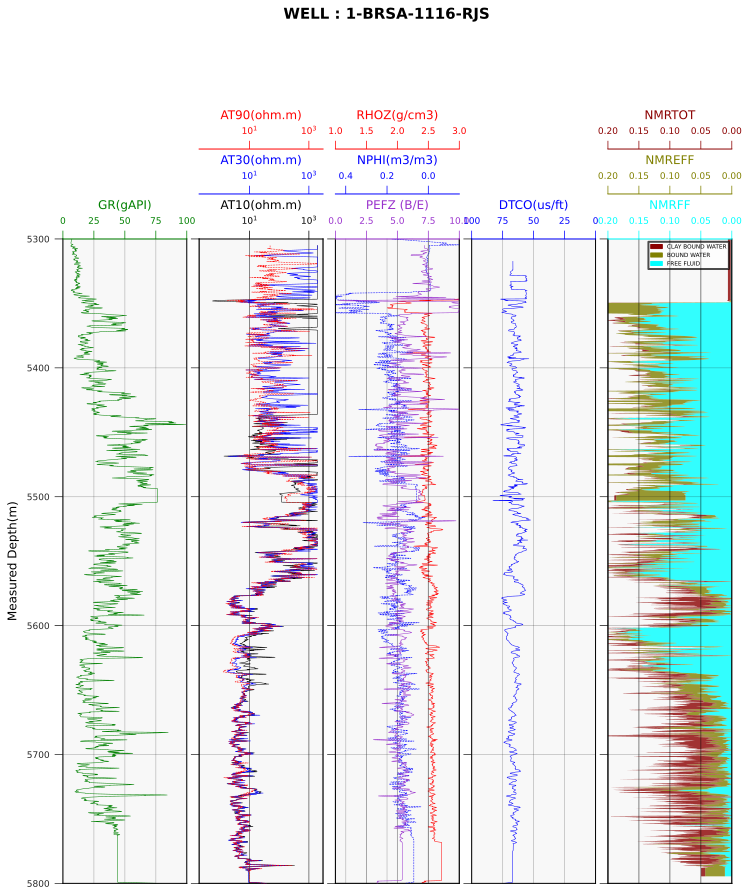

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12,14))
fig.suptitle("WELL : 1-BRSA-1116-RJS", fontsize=15, fontweight='bold')
fig.subplots_adjust(top=0.75, wspace=0.5)

track_names = ['GR(gAPI)','AT10(ohm.m)','AT30(ohm.m)','AT90(ohm.m)','NPHI(m3/m3)','RHOZ(g/cm3)', 'PEFZ (B/E)','DTCO(us/ft)','NMREFF','NMRFF','NMRTOT']

#Set up the subplots grid
ax1 = plt.subplot2grid((1,5),(0,0),rowspan=1,colspan=1)    # GR  

ax2 = plt.subplot2grid((1,5),(0,1),rowspan=1,colspan=1)    # AT      
ax3 = ax2.twiny()
ax4 = ax2.twiny()

ax5 = plt.subplot2grid((1,5),(0,2),rowspan=1,colspan=1)    # RHOB
ax6 = ax5.twiny()                                          # NPHI
ax7 = ax5.twiny()                                          # PEFZ

ax8 = plt.subplot2grid((1,5),(0,3),rowspan=1,colspan=1)    # DTCO

ax9 = plt.subplot2grid((1,5),(0,4),rowspan=1,colspan=1)    # NMR
ax10 = ax9.twiny()
ax11 = ax9.twiny()


####################################################################


# First Track: GR
ax1.plot("GR","DEPTH", data = df_GR, color = "green", lw = 0.5)            # To call the data from the df dataframe 
ax1.set_xlim(0,100)                                                      
ax1.spines['top'].set_position(('outward',0)) 
ax1.set_xlabel('GR(gAPI)',color='green')  
ax1.set_ylabel('Measured Depth(m)',color='black') 
ax1.tick_params(axis='x', colors='green')
ax1.spines["top"].set_edgecolor("green")


# Second Track: RT90, RT30, AT10
ax2.plot("AT10","DEPTH", data= df_AT, color="black", lw = 0.5)
ax2.set_xlim(0.2,3000)                                                   # [0.2-2000] is the typical rang
ax2.semilogx()                                                           # x in a log scale
ax2.spines['top'].set_position(('outward',0))
ax2.set_xlabel('AT10(ohm.m)', color='black') 
ax2.tick_params(axis='x', colors='black')
ax2.spines["top"].set_edgecolor("black")

ax3.plot("AT30","DEPTH", data= df_AT, color="blue", lw = 0.5)
ax3.set_xlim(0.2,3000)                                                   # [0.2-2000] is the typical rang
ax3.semilogx()                                                           # x in a log scale
ax3.spines['top'].set_position(('outward',45))
ax3.set_xlabel('AT30(ohm.m)', color='blue') 
ax3.tick_params(axis='x', colors='blue')
ax3.spines["top"].set_edgecolor("blue")

ax4.plot("AT90","DEPTH", data= df_AT, color="red", lw = 0.5, linestyle = '--')
ax4.set_xlim(0.2,3000)                                                    
ax4.semilogx()                                                            
ax4.spines['top'].set_position(('outward',90))
ax4.set_xlabel('AT90(ohm.m)', color='red') 
ax4.tick_params(axis='x', colors='red')
ax4.spines["top"].set_edgecolor("red")


# Third Track: RHOZ, NPHI

ax5.plot("RHOZ","DEPTH", data= df_RHOZ, color="red", lw = 0.5)
ax5.set_xlim(1,3)
ax5.spines['top'].set_position(('outward',90))
ax5.set_xlabel('RHOZ(g/cm3)', color='red') 
ax5.tick_params(axis='x', colors='red')
ax5.spines["top"].set_edgecolor("red")


ax6.plot("NPHI","DEPTH", data= df_NPHI, color="blue", lw = 0.5, linestyle = '--')
ax6.set_xlim(0.45,-0.15)                                                         
ax6.spines['top'].set_position(('outward',45))
ax6.set_xlabel('NPHI(m3/m3)', color='blue') 
ax6.tick_params(axis='x', colors='blue')
ax6.spines["top"].set_edgecolor("blue")


# Forth Track: PEFZ
ax7.plot("PEFZ","DEPTH", data= df_PEFZ, color="darkorchid", lw = 0.5)
ax7.set_xlim(0,10)                                                      
ax7.spines['top'].set_position(('outward',0))
ax7.set_xlabel('PEFZ (B/E)', color='darkorchid') 
ax7.tick_params(axis='x', colors='darkorchid')
ax7.spines["top"].set_edgecolor("darkorchid")


# Fifth Track: DTCO
ax8.plot("DTCO","DEPTH", data= df_DTCO, color="blue", lw = 0.5)
ax8.set_xlim(100,0)                                                      
ax8.spines['top'].set_position(('outward',0))
ax8.set_xlabel('DTCO(us/ft)', color='blue') 
ax8.tick_params(axis='x', colors='blue')
ax8.spines["top"].set_edgecolor("blue")



# Sixth Track: NMR
ax9.plot("TCMR","DEPTH", data= df_NMR, color="darkred", lw = 0)
ax9.set_xlim(0.2,0)                                                   # [0.2-2000] is the typical rang   
ax9.spines['top'].set_position(('outward',90))
ax9.set_xlabel('NMRTOT', color='darkred') 
ax9.tick_params(axis='x', colors='darkred')
ax9.spines["top"].set_edgecolor("darkred")

ax10.plot("CMRP_3MS","DEPTH", data= df_NMR, color="olive", lw = 0)
ax10.set_xlim(0.2,0)                                                   # [0.2-2000] is the typical rang     
ax10.spines['top'].set_position(('outward',45))
ax10.set_xlabel('NMREFF', color='olive') 
ax10.tick_params(axis='x', colors='olive')
ax10.spines["top"].set_edgecolor("olive")

ax11.plot("CMFF","DEPTH", data= df_NMR, color="aqua", lw = 0)
ax11.set_xlim(0.2,0)                                                   # [0.2-2000] is the typical rang
ax11.spines['top'].set_position(('outward',0))
ax11.set_xlabel('NMRFF', color='aqua') 
ax11.tick_params(axis='x', colors='aqua')
ax11.spines["top"].set_edgecolor("aqua")

#======
import matplotlib.patches as mpatches

# Fill the areas with shading using RGB values and modified alpha values
ax9.fill_betweenx(df_NMR["DEPTH"], df_NMR["CMFF"], 0, facecolor=(0, 1, 1), alpha=0.8, interpolate=True)  # Aqua
ax9.fill_betweenx(df_NMR["DEPTH"], df_NMR["CMRP_3MS"], df_NMR["CMFF"], facecolor=(128/255, 128/255, 0), alpha=0.8, interpolate=True)  # Olive
ax9.fill_betweenx(df_NMR["DEPTH"], df_NMR["TCMR"], df_NMR["CMRP_3MS"], facecolor=(139/255, 0, 0), alpha=0.8, interpolate=True)  # Dark Red

# Create a legend for the fifth track
Clay_Bound_Water = mpatches.Patch(color=(139/255, 0, 0), label='CLAY BOUND WATER')
Bound_Water = mpatches.Patch(color=(128/255, 128/255, 0), label='BOUND WATER')
Free_Fluid = mpatches.Patch(color=(0, 1, 1), label='FREE FLUID')

legend = ax9.legend(handles=[Clay_Bound_Water, Bound_Water, Free_Fluid], loc='upper right', fontsize='xx-small', framealpha=0.7)

# Set the border properties of the legend
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('black')


###############################################################################################################################################################################

for i, ax in enumerate(fig.axes):
 
    ax.set_ylim(5800,5300)  # Set the depth range
                                          # Depth interval for the prediction
    
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
"""
    ax.set_xlabel(track_names[i])
    
    if i == 5:                                            
        ax.spines["top"].set_position(("axes", 2))
    else:
        ax.grid(color='black', lw=0.7)                  # To display the grid 
""" 

# Add a black border to each subplot 
for ax in [ax1, ax2, ax5, ax8, ax9]:
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black') 

# Hide tick labels on the y-axis
for ax in [ax2, ax5, ax8, ax9]:
    plt.setp(ax.get_yticklabels(), visible=False)

    
# Reduce the space between each subplot
fig.subplots_adjust(wspace = 0.1)


###############################################################################################################################################################################
# Save plot

save_path = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Plots - data evaluation for selection/Well-log Plot (1-BRSA-1116-RJS).png'

# Save the plot to the specified path
plt.savefig(save_path, dpi=300, bbox_inches="tight")

# Show the plot (optional)
plt.show()

# ================

<span style='color:brown'> <span style="font-size:19px;"> **STEP 5: create an unique DataFrame containing all the Well Log Data required for the ML prediction**

# 5350 - 5794

In [51]:
"""
df_GR = df_GR[(df_GR.index >= 626) & (df_GR.index <= 3530)]
df_AT = df_AT[(df_AT.index >= 600) & (df_AT.index <= 6420)]
df_RHOZ = df_RHOZ[(df_RHOZ.index >= 900) & (df_RHOZ.index <= 9620)]
df_NPHI = df_NPHI[(df_NPHI.index >= 625) & (df_NPHI.index <= 3528)]
df_DTCO = df_DTCO[(df_DTCO.index >= 220) & (df_DTCO.index <= 3129)]
df_PEFZ = df_PEFZ[(df_PEFZ.index >= 900) & (df_PEFZ.index <= 9620)]
df_NMR = df_NMR.drop(df_NMR.index[:1975])  # We keep all the rows until index 2281 + Reset Index

df_GR, df_AT, df_RHOZ, df_NPHI, df_DTCO, df_PEFZ, df_NMR
"""

'\ndf_GR = df_GR[(df_GR.index >= 626) & (df_GR.index <= 3530)]\ndf_AT = df_AT[(df_AT.index >= 600) & (df_AT.index <= 6420)]\ndf_RHOZ = df_RHOZ[(df_RHOZ.index >= 900) & (df_RHOZ.index <= 9620)]\ndf_NPHI = df_NPHI[(df_NPHI.index >= 625) & (df_NPHI.index <= 3528)]\ndf_DTCO = df_DTCO[(df_DTCO.index >= 220) & (df_DTCO.index <= 3129)]\ndf_PEFZ = df_PEFZ[(df_PEFZ.index >= 900) & (df_PEFZ.index <= 9620)]\ndf_NMR = df_NMR.drop(df_NMR.index[:1975])  # We keep all the rows until index 2281 + Reset Index\n\ndf_GR, df_AT, df_RHOZ, df_NPHI, df_DTCO, df_PEFZ, df_NMR\n'

# 5350 - 5560 (RESERVOIR) (BVE100 and BVE200) NOT BVE300

In [52]:
"""
df_GR = df_GR[(df_GR.index >= 626) & (df_GR.index <= 1995)]
df_AT = df_AT[(df_AT.index >= 600) & (df_AT.index <= 3350)]
df_RHOZ = df_RHOZ[(df_RHOZ.index >= 900) & (df_RHOZ.index <= 5002)]
df_NPHI = df_NPHI[(df_NPHI.index >= 625) & (df_NPHI.index <= 1995)]
df_DTCO = df_DTCO[(df_DTCO.index >= 220) & (df_DTCO.index <= 1595)]
df_PEFZ = df_PEFZ[(df_PEFZ.index >= 900) & (df_PEFZ.index <= 5002)]
df_NMR = df_NMR[(df_NMR.index >= 1973) & (df_NMR.index <= 3075)]

df_GR, df_AT, df_RHOZ, df_NPHI, df_DTCO, df_PEFZ, df_NMR
"""

'\ndf_GR = df_GR[(df_GR.index >= 626) & (df_GR.index <= 1995)]\ndf_AT = df_AT[(df_AT.index >= 600) & (df_AT.index <= 3350)]\ndf_RHOZ = df_RHOZ[(df_RHOZ.index >= 900) & (df_RHOZ.index <= 5002)]\ndf_NPHI = df_NPHI[(df_NPHI.index >= 625) & (df_NPHI.index <= 1995)]\ndf_DTCO = df_DTCO[(df_DTCO.index >= 220) & (df_DTCO.index <= 1595)]\ndf_PEFZ = df_PEFZ[(df_PEFZ.index >= 900) & (df_PEFZ.index <= 5002)]\ndf_NMR = df_NMR[(df_NMR.index >= 1973) & (df_NMR.index <= 3075)]\n\ndf_GR, df_AT, df_RHOZ, df_NPHI, df_DTCO, df_PEFZ, df_NMR\n'

# 5358 - 5560 (RESERVOIR) (BVE100 and BVE200) NOT BVE300

In [53]:
#=====
df0_GR = df0.drop(columns=["NPHI"])
df3_GR = df3.drop(columns=["NPHI"])
df7_GR = df7.drop(columns=["NPHI", "DTCO"])
df10_GR = df10.drop(columns=["NPHI", "DTCO"])
df3_GR = df3_GR.drop(df3_GR.index[326:])  
df10_GR = df10_GR.drop(df10_GR.index[:1235])  
df7_GR = df7_GR.drop(df7_GR.index[:525])  
df_GR = pd.concat([df3_GR, df0_GR, df10_GR, df7_GR], axis = 0, ignore_index = True)
#
df0_NPHI = df0.drop(columns=["GR"])
df3_NPHI = df3.drop(columns=["GR"])
df7_NPHI = df7.drop(columns=["GR", "DTCO"])
df10_NPHI = df10.drop(columns=["GR", "DTCO"])
df3_NPHI = df3_NPHI.drop(df3_NPHI.index[326:])  
df10_NPHI = df10_NPHI.drop(df10_NPHI.index[:1235])  
df7_NPHI = df7_NPHI.drop(df7_NPHI.index[:525])  
df_NPHI = pd.concat([df3_NPHI, df0_NPHI, df10_NPHI, df7_NPHI], axis = 0, ignore_index = True)
#
df2_RHOZ = df2.drop(columns=["PEFZ"])
df8_RHOZ = df8.drop(columns=["PEFZ"])
df11_RHOZ = df11.drop(columns=["PEFZ"])
df11_RHOZ = df11_RHOZ.drop(df11_RHOZ.index[:3670]) 
df8_RHOZ = df8_RHOZ.drop(df8_RHOZ.index[:1540])  
df_RHOZ = pd.concat([df2_RHOZ, df11_RHOZ, df8_RHOZ], axis = 0, ignore_index = True)
#
df2_PEFZ = df2.drop(columns=["RHOZ"])
df8_PEFZ = df8.drop(columns=["RHOZ"])
df11_PEFZ = df11.drop(columns=["RHOZ"])
df11_PEFZ = df11_PEFZ.drop(df11_PEFZ.index[:3670]) 
df8_PEFZ = df8_PEFZ.drop(df8_PEFZ.index[:1540])  
df_PEFZ = pd.concat([df2_PEFZ, df11_PEFZ, df8_PEFZ], axis = 0, ignore_index = True)
#
df10_DTCO = df10.drop(columns=["GR", "NPHI"])
df7_DTCO = df7.drop(columns=["GR", "NPHI"])
df7_DTCO = df7_DTCO.drop(df7_DTCO.index[:530]) 
df_DTCO = pd.concat([df10_DTCO, df7_DTCO], axis = 0, ignore_index = True)
#
df1_AT = df1
df12_AT = df12
df9_AT = df9
df12_AT = df12_AT.drop(df12_AT.index[:2455]) 
df9_AT = df9_AT.drop(df9_AT.index[:1050]) 
df_AT = pd.concat([df1_AT, df12_AT, df9_AT], axis = 0, ignore_index = True)
#
df4_NMR= df4
df6_NMR = df6
df6_NMR = df6_NMR.drop(df6_NMR.index[:262]) 
df_NMR = pd.concat([df4_NMR, df6_NMR], axis = 0, ignore_index = True)
#======

df_GR = df_GR[(df_GR.index >= 680) & (df_GR.index <= 1995)]
df_AT = df_AT[(df_AT.index >= 700) & (df_AT.index <= 3350)]
df_RHOZ = df_RHOZ[(df_RHOZ.index >= 1050) & (df_RHOZ.index <= 5002)]
df_NPHI = df_NPHI[(df_NPHI.index >= 680) & (df_NPHI.index <= 1995)]
df_DTCO = df_DTCO[(df_DTCO.index >= 260) & (df_DTCO.index <= 1595)]
df_PEFZ = df_PEFZ[(df_PEFZ.index >= 1055) & (df_PEFZ.index <= 5002)]
df_NMR = df_NMR[(df_NMR.index >= 2015) & (df_NMR.index <= 3075)]

df_GR, df_AT, df_RHOZ, df_NPHI, df_DTCO, df_PEFZ, df_NMR

(            DEPTH         GR
 680   5358.993652  43.958698
 681   5359.145996  50.214672
 682   5359.298340  51.442577
 683   5359.450684  49.099472
 684   5359.603027  48.586651
 ...           ...        ...
 1991  5560.009277  25.194620
 1992  5560.161621  21.646051
 1993  5560.313965  18.730562
 1994  5560.466309  17.236074
 1995  5560.618652  18.458548
 
 [1316 rows x 2 columns],
             DEPTH        AT10        AT20         AT30         AT60  \
 700   5358.460449  415.437988   58.108261    55.066479    30.187330   
 701   5358.536621  852.538330   83.557350    56.289433    26.355669   
 702   5358.612793  926.618835   76.700928    41.814354    21.827528   
 703   5358.688965  404.017761   57.812527    38.111984    18.904280   
 704   5358.765137  199.480743   38.600475    33.666451    16.180012   
 ...           ...         ...         ...          ...          ...   
 3346  5560.313965  753.394104  438.357635  1674.343140  1619.290039   
 3347  5560.390137  613.024414  497.

In [54]:
import pandas as pd

# Create a list of DataFrames to merge
dataframes_to_merge = [df_AT[['DEPTH', 'AT10', 'AT30', 'AT90']],
                       df_RHOZ[['DEPTH', 'RHOZ']],
                       df_NPHI[['DEPTH', 'NPHI']],
                       df_DTCO[['DEPTH', 'DTCO']],
                       df_PEFZ[['DEPTH', 'PEFZ']],
                       df_NMR[['DEPTH', 'CMFF', 'CMRP_3MS', 'TCMR']]]

# Initialize the merged DataFrame with df_GR
df_1116_ML = df_GR

# Loop through the list of DataFrames and merge them with df_944_ML
for df in dataframes_to_merge:
    df_1116_ML = pd.merge_asof(df_1116_ML, df, on='DEPTH', direction='nearest')

# Reset the index if needed
# df_944_ML.reset_index(drop=True, inplace=True)

# Display the merged DataFrame
df_1116_ML

,DEPTH,GR,AT10,AT30,AT90,RHOZ,NPHI,DTCO,PEFZ,CMFF,CMRP_3MS,TCMR
0,5358.993652,43.958698,76.102608,37.830448,16.687830,2.491682,0.197165,66.492004,5.102749,0.119948,0.154198,0.154217
1,5359.145996,50.214672,44.973991,16.877588,9.727284,2.503132,0.194263,64.525551,5.110857,0.108406,0.144810,0.144813
2,5359.298340,51.442577,97.680161,17.893017,9.559625,2.511300,0.184646,64.186310,5.136480,0.108406,0.144810,0.144813
3,5359.450684,49.099472,123.433739,22.349895,11.119614,2.522695,0.157939,64.227921,5.168157,0.098564,0.134407,0.134411
4,5359.603027,48.586651,177.402328,32.093761,15.711706,2.512599,0.141793,64.376938,5.210169,0.090104,0.127551,0.128026
...,...,...,...,...,...,...,...,...,...,...,...,...
1311,5560.009277,25.194620,370.844147,443.657196,284.257538,2.410358,0.167036,73.990562,5.168015,0.165618,0.170487,0.177539
1312,5560.161621,21.646051,565.264648,1050.263550,454.497955,2.414290,0.162737,74.333557,5.183177,0.144250,0.157453,0.157456
1313,5560.313965,18.730562,753.394104,1674.343140,814.052246,2.414290,0.154881,74.137337,5.183177,0.144250,0.157453,0.157456
1314,5560.466309,17.236074,638.756409,1950.000000,1443.658936,2.414290,0.141860,73.096649,5.183177,0.144250,0.157453,0.157456


We drop the NaN values. The new depth interval is 

In [55]:
df_1116_ML = df_1116_ML.dropna()
df_1116_ML

,DEPTH,GR,AT10,AT30,AT90,RHOZ,NPHI,DTCO,PEFZ,CMFF,CMRP_3MS,TCMR
0,5358.993652,43.958698,76.102608,37.830448,16.687830,2.491682,0.197165,66.492004,5.102749,0.119948,0.154198,0.154217
1,5359.145996,50.214672,44.973991,16.877588,9.727284,2.503132,0.194263,64.525551,5.110857,0.108406,0.144810,0.144813
2,5359.298340,51.442577,97.680161,17.893017,9.559625,2.511300,0.184646,64.186310,5.136480,0.108406,0.144810,0.144813
3,5359.450684,49.099472,123.433739,22.349895,11.119614,2.522695,0.157939,64.227921,5.168157,0.098564,0.134407,0.134411
4,5359.603027,48.586651,177.402328,32.093761,15.711706,2.512599,0.141793,64.376938,5.210169,0.090104,0.127551,0.128026
...,...,...,...,...,...,...,...,...,...,...,...,...
1311,5560.009277,25.194620,370.844147,443.657196,284.257538,2.410358,0.167036,73.990562,5.168015,0.165618,0.170487,0.177539
1312,5560.161621,21.646051,565.264648,1050.263550,454.497955,2.414290,0.162737,74.333557,5.183177,0.144250,0.157453,0.157456
1313,5560.313965,18.730562,753.394104,1674.343140,814.052246,2.414290,0.154881,74.137337,5.183177,0.144250,0.157453,0.157456
1314,5560.466309,17.236074,638.756409,1950.000000,1443.658936,2.414290,0.141860,73.096649,5.183177,0.144250,0.157453,0.157456


Convert the DataFrame into a CSV file (CSV file is required for ML Algorithms implementation)

In [56]:
destination_file_path = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Output of well data, [unique dataframe creation]/df_1116_ML.csv'

df_1116_ML.to_csv(destination_file_path, index=None)

print(f"DataFrame saved as CSV file at: {destination_file_path}")

DataFrame saved as CSV file at: /Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Output of well data, [unique dataframe creation]/df_1116_ML.csv
